## 🧠 YOLO-MultiSpectral: Demo Notebook

### 🔍 Introduction

This notebook demonstrates how to to quickly use modified YOLO models for 5 channel input using weeds-galore dataset.

[Dataset weeds galore](https://github.com/GFZ/weedsgalore). 
RGB and RGBRN (red,green,blue,red edge, Near infra red)

BIG NOTE:  In Colab enable GPUs .  From main menu click -> "runtime" -> "change runtime type" -> "T4 GPU"




---

### ⚙️ Step 1: Setup Environment

Clone the YOLO-MultiSpectral repository and install required python packages.

In [1]:

#  Clone repository and install requirements.txt
import os
import shutil
import subprocess

current_path = os.getcwd()
clone_dir = current_path + "/YOLO-Multispectral"
# Update if exists
if os.path.isdir(clone_dir):
    print(f"🧹Update any change files {clone_dir}")
    %cd {clone_dir}
    # !git fetch origin
    # !git reset --hard origin/main
    # !git clean -fd

    !git pull
    #%cd ..  # return to original directory if needed
else:
    # Clone your GitHub repo
    !git clone https://github.com/aesparon/YOLO-Multispectral.git
    # Change directory to the repo root   REMOVE FOR COLAB
    %cd YOLO-Multispectral

# Now install requirements
req_path = os.path.join(clone_dir, "code", "requirements.txt")
!pip install -r "{req_path}"

d:\PD\Publications\Yolo_mod\github\colab_test\notebooks\YOLO-Multispectral


Cloning into 'YOLO-Multispectral'...


     ---------------------------------------- 28.9/28.9 MB 4.1 MB/s eta 0:00:00


### 🔍 Step 2. Download weeds galore dataset

In [2]:
# add code path for script files
import os
import sys 

# add code folder
code_path = os.path.abspath(clone_dir +  "/code/")
sys.path.insert(0, code_path)
from utils_downloader import download_and_extract_zip

# modified yolo source for multispectral
yolo_source_path=os.path.abspath(clone_dir +  "/code/ultralytics_MS/")

# Set parameters
url = "https://doidata.gfz.de/weedsgalore_e_celikkan_2024/weedsgalore-dataset.zip"
output_zip = clone_dir + "/datasets/weedsgalore-dataset.zip"
extract_dir = clone_dir + "/datasets/"

# Call the function
download_and_extract_zip(url, output_zip, extract_dir)

🔍 Checking file info...
📥 Downloading with resume support...


Downloading: 100%|██████████| 321M/321M [06:40<00:00, 841kB/s]  


✅ Download complete: d:\PD\Publications\Yolo_mod\github\colab_test\notebooks/YOLO-Multispectral/datasets/weedsgalore-dataset.zip
📦 Extracting...


Extracting: 100%|██████████| 1119/1119 [00:01<00:00, 858.04file/s]

✅ Extracted to: d:\PD\Publications\Yolo_mod\github\colab_test\notebooks/YOLO-Multispectral/datasets/


### 🔍 Step 3: Create train/val/test for RGB and RGBRN
##### Downloaded data set needs to be pre-processed to create yolo annotations for training

In [ ]:
from pre_process_images import *

clip_size= "600"
classes_list = ['maize','amaranth','grass','quickweed','other']
number_of_classes = len(classes_list)

# Downloaded image folders  ###########################################################
input_folders = [
    extract_dir + "/weedsgalore-dataset/2023-05-25/images/",
    extract_dir + "/weedsgalore-dataset/2023-05-30/images/",
    extract_dir + "/weedsgalore-dataset/2023-06-06/images/",
    extract_dir + "/weedsgalore-dataset/2023-06-15/images/"
]
images_merge_band_images = extract_dir + "/weedsgalore-dataset/images_merge/"

# Nerge all band images from all date folders into a single folder
merge_files(input_folders, images_merge_band_images)

# Stack RGB and RGBRN images and convert from uint16 to uint8 and split train/val/test  #######################################################3
#  yolo does not train on uint16 but will mod yolo to test any increase in accuracy using uinr16 over uint8 (future wotk)
# TODO - test uint16 for better results
uint16_to_uint8_method = 'normalize'   # 'stretch'    # 'normalize' 

#################################################     RGB   #############################################################
# stack RGB and convert to uint8 and separate to train/val/test using same split as weeds-galore
labels_path_to_merge_RGB =  clone_dir + '/datasets/weeds_galore_processed/RGB/'
output_RGB_train_val_test_path = stack_RGB_set_uint8_sort_train_val_test (images_merge_band_images , uint16_to_uint8_method, labels_path_to_merge_RGB )
project_base_path_RGB =  output_RGB_train_val_test_path + '/outputs/'      #  'D:/PD/yolo_mod/working2/projects/weeds_galore/RGBRN_tests_final2/'
os.makedirs(project_base_path_RGB, exist_ok=True)
# can auto detect
number_of_channels_RGB = 3 
# expect folders for images/labels in train/val/test
images_train_path_RGB= output_RGB_train_val_test_path +  "train/" 
images_val_path_RGB=  output_RGB_train_val_test_path + "val/" 
# set to '' or None id NO test data for datasets with no test data
images_test_path_RGB =  output_RGB_train_val_test_path + "test/" 



#################################################     RGBRN   #############################################################
#stack RGBRN and convert to uint8 and separate to train/val/test using same split as weeds-galore
labels_path_to_merge_RGBRN =  clone_dir + '/datasets/weeds_galore_processed/RGBRN/'
output_RGBRN_train_val_test_path =  stack_RGBRN_set_uint8_sort_train_val_test (images_merge_band_images , uint16_to_uint8_method , labels_path_to_merge_RGBRN  )
project_base_path_RGBRN =  output_RGBRN_train_val_test_path + '/outputs/'      #  'D:/PD/yolo_mod/working2/projects/weeds_galore/RGBRN_tests_final2/'
os.makedirs(project_base_path_RGBRN, exist_ok=True)
# can auto detect
number_of_channels_RGBRN = 5  
# expect folders for images/labels in train/val/test
images_train_path_RGBRN= output_RGBRN_train_val_test_path +  "train/" 
images_val_path_RGBRN=  output_RGBRN_train_val_test_path + "val/" 
# set to '' or None id NO test data for datasets with no test data
images_test_path_RGBRN=  output_RGBRN_train_val_test_path + "test/"

### Visualise annotations

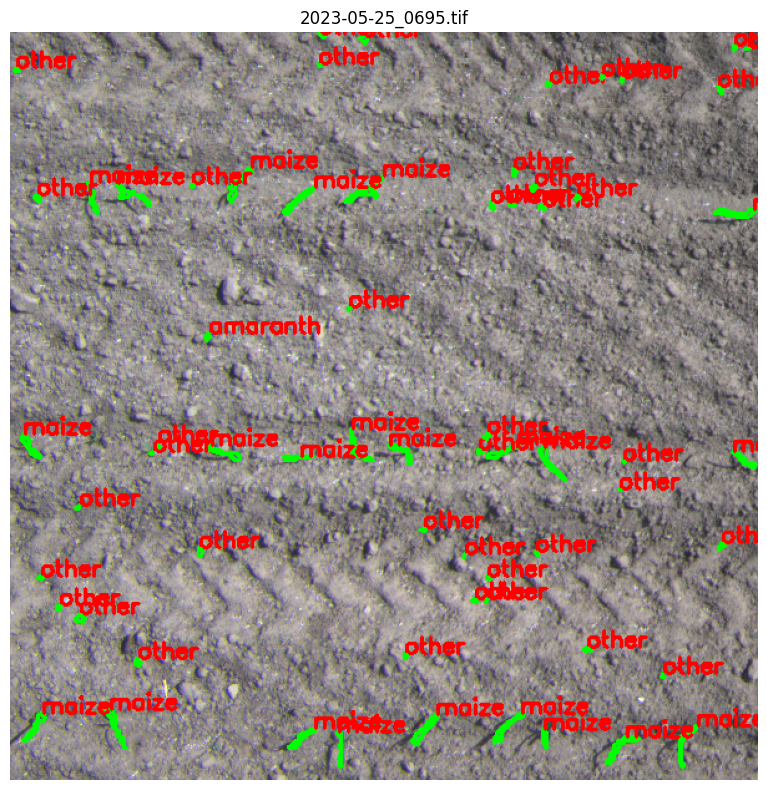

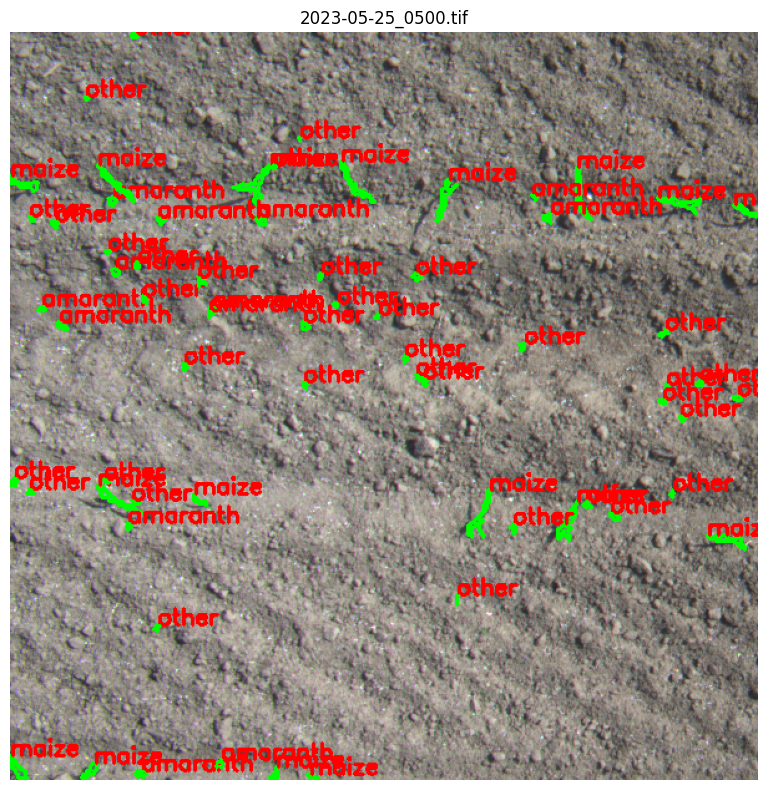

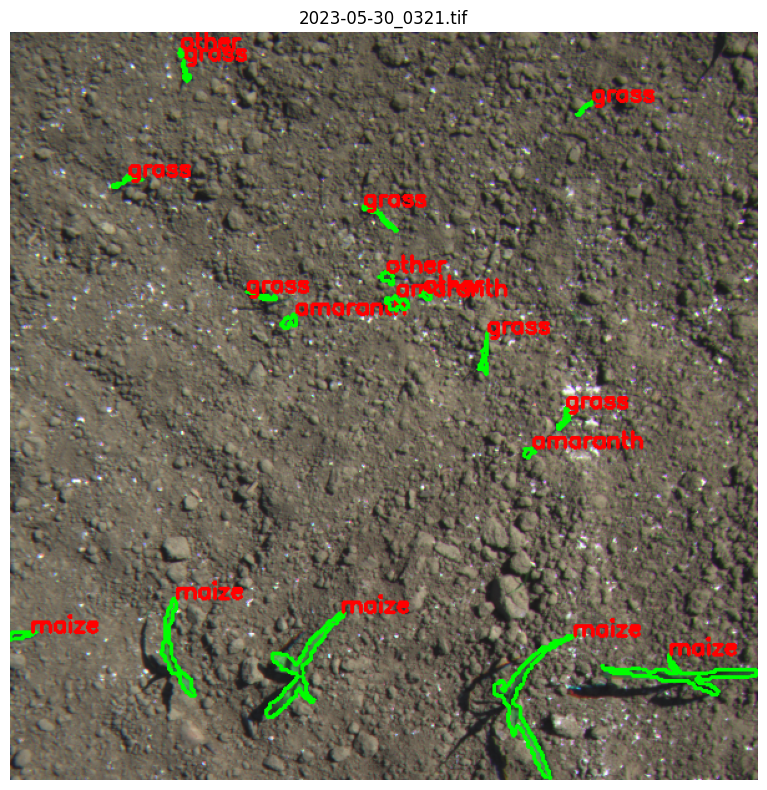

In [5]:
import importlib
import visualise_yolo_annotations

importlib.reload(visualise_yolo_annotations)
from visualise_yolo_annotations import plot_yolo_segmentation
%matplotlib inline

# RANDOM SELECTION
number_of_samples_to_view = 3
plot_yolo_segmentation(images_train_path_RGB + '/images/', images_train_path_RGB + '/labels/', class_names=classes_list, num_samples=number_of_samples_to_view)

### Step 4. Set parameters to modify YOLO and create multispectral model.

In [ ]:
import sys
import os

# yolo modified source folder
yolo_source_path = os.path.abspath(clone_dir + "/code/ultralytics_MS/")
sys.path.insert(0, yolo_source_path)
from ultralytics import YOLO
import torch

from pathlib import Path
from mod_pt_model_seg import patch_yolo_seg_ckpt
from train_eval import create_train_yaml


# parameters
num_epochs = 500   # force stop by patience
batch_size = 8   # 4   # yolo_config['batch']
patience =30



#  ADD experiment 1

#experiment 1
run_experiment = 1   # 2 3 4 TL etc

# use_transfer_learning = True

# if use_transfer_learning: 
#     # yolo modified model configuration
#     model_base =  'yolo11x-seg.pt'    #   OPTIONS  'yolov8x-seg.pt'   OR      # 'yolo11n-seg.pt'
# else:
#     model_base =  'yolo11x-seg.yaml'    #   OPTIONS  'yolov8x-seg.yaml'    OR   'yolo11x-seg.yaml'   
if run_experiment == 1:
    model_base =  'yolo11x-seg.pt' 

    #Initialise additional  channels/bands when more then 3
    channel_init_mode =  'avg'          # OPTIONS   'random'       # 'avg'   'zeros'     'random'    'same'

    # Additional backbone modidifications for performance testing
    use_cbam=False
    use_eca=False
    use_spectral=False 
    use_dropblock=False
    drop_prob=0.1



### Step 5. Create RGB and RGBRN modified models

In [7]:

model_base_str = model_base.replace('.','_') # for file path - remove .extension


#################################################     RGB mod yolo model      ###########################################################################
output_model_train_base_RGB =  project_base_path_RGB  + '_RGB_' + model_base_str + '_method_add_ch_' + channel_init_mode 
#os.makedirs(output_model_train_base, exist_ok=True)

# from mod_pt_model_seg_v1.py
model_created_RGB ,output_model_train_RGB  = patch_yolo_seg_ckpt (
    model_base=model_base,
    output_model_train= output_model_train_base_RGB,
    yolo_source_path = yolo_source_path,
    in_channels=number_of_channels_RGB,
    nc=number_of_classes,
    channel_init_mode=channel_init_mode,
    use_cbam=use_cbam, 
    use_eca=use_eca, 
    use_spectral=use_spectral, 
    use_dropblock=use_dropblock, 
    drop_prob=0.1
)
# dynamic create train yaml
output_yaml_RGB =  project_base_path_RGB + "data_RGB.yaml"
# weeds galore has test data - If dataset has no test data set -> images_test_path = None
create_train_yaml(images_train_path_RGB, images_val_path_RGB ,classes_list , number_of_channels_RGB, output_yaml_RGB ,  images_test_path = images_test_path_RGB)

#################################################     RGBRNN mod yolo model      ###########################################################################
output_model_train_base_RGBRN =  project_base_path_RGBRN  + '_RGBRN_' + model_base_str + '_method_add_ch_' + channel_init_mode 
#os.makedirs(output_model_train_base, exist_ok=True)

# from mod_pt_model_seg_v1.py
model_created_RGBRN ,output_model_train_RGBRN  = patch_yolo_seg_ckpt (
    model_base=model_base,
    output_model_train= output_model_train_base_RGBRN,
    yolo_source_path = yolo_source_path,
    in_channels=number_of_channels_RGBRN,
    nc=number_of_classes,
    channel_init_mode=channel_init_mode,
    use_cbam=use_cbam, 
    use_eca=use_eca, 
    use_spectral=use_spectral, 
    use_dropblock=use_dropblock, 
    drop_prob=0.1
)
# dynamic create train yaml
output_yaml_RGBRN =  project_base_path_RGBRN + "data_RGBRN.yaml"
# weeds galore has test data - If dataset has no test data set -> images_test_path = None
create_train_yaml(images_train_path_RGBRN, images_val_path_RGBRN ,classes_list , number_of_channels_RGBRN, output_yaml_RGBRN ,  images_test_path = images_test_path_RGBRN)



📦 Loading pretrained YOLO segmentation model: yolo11x-seg.pt


100%|██████████| 119M/119M [00:08<00:00, 15.0MB/s] 


🛠️ Patching input conv from 3 to 3 using 'avg'
🧠 Updating segmentation head to 5 classes
Saving patched model to: d:\PD\Publications\Yolo_mod\github\colab_test\notebooks/YOLO-Multispectral/datasets/weeds_galore_processed/RGB//outputs/_RGB_yolo11x-seg_pt_method_add_ch_avg_TL_seg/mod_model/yolo11x-seg_TL.pt
names: [maize,amaranth,grass,quickweed,other]

📦 Loading pretrained YOLO segmentation model: yolo11x-seg.pt
🛠️ Patching input conv from 3 to 5 using 'avg'
🧠 Updating segmentation head to 5 classes
Saving patched model to: d:\PD\Publications\Yolo_mod\github\colab_test\notebooks/YOLO-Multispectral/datasets/weeds_galore_processed/RGBRN//outputs/_RGBRN_yolo11x-seg_pt_method_add_ch_avg_TL_seg/mod_model/yolo11x-seg_TL.pt
names: [maize,amaranth,grass,quickweed,other]


### Step 5a. Train RGB

In [ ]:

%%capture captured_output     # limit display rows


# use created model   #################################################
model_path_RGB =os.path.dirname(model_created_RGB)
model_file_RGB = os.path.basename(model_created_RGB)

#  Check later - cannot pass path to   -> model = YOLO( path + 'yolo11x.pt') 
if model_path_RGB != '':
    os.chdir(model_path_RGB)
    #os.chdir('D:/PD/Publications/Yolo_mod/github/colab_test/notebooks/weedsgalore-dataset/train_val_test/RGBRN/outputs/weed_RGBRN_yolo11x-seg_yaml_method_random_eps_1000_no_TL_seg/mod_model/')
    
model_RGB = YOLO( model_file_RGB )

# Automatically use GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

seed=42  # for reproducing same results
##########################################  TRAIN  #######################################
results = model_RGB.train(
        #task='segment',
        batch= batch_size,   # batch_size,    # 32 on small    set to -1 to optimise to GPU
        data=output_yaml_RGB,
        epochs= num_epochs ,      #num_epochs,
        imgsz=int(clip_size),
        device=device,
        patience =patience ,
        #conf = conf,
        seed=seed , 
        name =   output_model_train_RGB ,     # 'RGBRN_y11x',   # 'D:/PD/Publications/Yolo_mod/github/colab_test/notebooks/weedsgalore-dataset/train_val_test/RGBRN/outputs/weed_RGBRN_yolo11x-seg_yaml_method_random_eps_1000_no_TL_seg/' ,   #output_model_train,
        exist_ok=True,
)  


# Show only last 10 lines of output
print('\n'.join(captured_output.stdout.strip().split('\n')[-10:]))

###   EVALUATE BEST and LAST MODELS
# yolo modified source folder
yolo_source_path = os.path.abspath(clone_dir + "/code/ultralytics_MS/")

# Code folder
from train_eval import eval_best_last
try:
    # can be incremented on 2nd run
    output_model_train =results.save_dir
except NameError:
    output_model_train = output_model_train_RGB

if images_test_path_RGB != '':
    # run test evaluation if exists
    model_save_path = str(output_model_train)
    best_last = 'best'
    eval_best_last(model_save_path , output_yaml_RGB , best_last , yolo_source_path)

    best_last = 'last'
    eval_best_last(model_save_path , output_yaml_RGB , best_last , yolo_source_path)


### Step 5b. Train RGBRN

In [9]:
output_model_train_RGBRN

'd:\\PD\\Publications\\Yolo_mod\\github\\colab_test\\notebooks/YOLO-Multispectral/datasets/weeds_galore_processed/RGBRN//outputs/_RGBRN_yolo11x-seg_pt_method_add_ch_avg_TL_seg'

In [ ]:
%%capture captured_output     # limit display rows


# use created model   #################################################
model_path_RGBRN =os.path.dirname(model_created_RGBRN)
model_file_RGBRN = os.path.basename(model_created_RGBRN)

#  Check later - cannot pass path to   -> model = YOLO( path + 'yolo11x.pt') 
if model_path_RGBRN != '':
    os.chdir(model_path_RGBRN)
    #os.chdir('D:/PD/Publications/Yolo_mod/github/colab_test/notebooks/weedsgalore-dataset/train_val_test/RGBRN/outputs/weed_RGBRN_yolo11x-seg_yaml_method_random_eps_1000_no_TL_seg/mod_model/')
    
model_RGBRN = YOLO( model_file_RGBRN )

# Automatically use GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

seed=42  # for reproducing same results
##########################################  TRAIN  #######################################
results = model_RGBRN.train(
        #task='segment',
        batch= batch_size,   # batch_size,    # 32 on small    set to -1 to optimise to GPU
        data=output_yaml_RGBRN,
        epochs= num_epochs ,      #num_epochs,
        imgsz=int(clip_size),
        device=device,
        patience =patience ,
        #conf = conf,
        seed=seed , 
        name =   output_model_train_RGBRN ,     # 'RGBRN_y11x',   # 'D:/PD/Publications/Yolo_mod/github/colab_test/notebooks/weedsgalore-dataset/train_val_test/RGBRN/outputs/weed_RGBRN_yolo11x-seg_yaml_method_random_eps_1000_no_TL_seg/' ,   #output_model_train,
        exist_ok=True,
)  

# Show only last 10 lines of output
print('\n'.join(captured_output.stdout.strip().split('\n')[-10:]))


###   EVALUATE BEST and LAST MODELS
# yolo modified source folder
yolo_source_path = os.path.abspath(clone_dir + "/code/ultralytics_MS/")

# Code folder
from train_eval import eval_best_last
try:
    # can be incremented on 2nd run
    output_model_train =results.save_dir
except NameError:
    output_model_train = output_model_train_RGBRN

if images_test_path_RGBRN != '':
    # run test evaluation if exists
    model_save_path = str(output_model_train)
    best_last = 'best'
    eval_best_last(model_save_path , output_yaml_RGBRN , best_last , yolo_source_path)

    best_last = 'last'
    eval_best_last(model_save_path , output_yaml_RGBRN , best_last , yolo_source_path)


### Sumarize RGB vs RGBRN results

In [19]:
project_base_path_RGBRN

'd:\\PD\\Publications\\Yolo_mod\\github\\colab_test\\notebooks/YOLO-Multispectral/datasets/weeds_galore_processed/RGBRN//outputs/'

In [30]:
from IPython.display import display, HTML

import compile_results_df_csv
importlib.reload(compile_results_df_csv)
from compile_results_df_csv import summary_results



display(HTML("<b><span style='font-size:18px'>📊 YOLO Training Summary EXP 1 </span></b>"))

df_RGB = summary_results(project_base_path_RGB)
print("RGB results")
display(df_RGB.style.hide(axis='index'))

df_RGBRN = summary_results(project_base_path_RGBRN)
print("RGBRN results")
display(df_RGBRN.style.hide(axis='index'))


RGB results


RGBRN results
